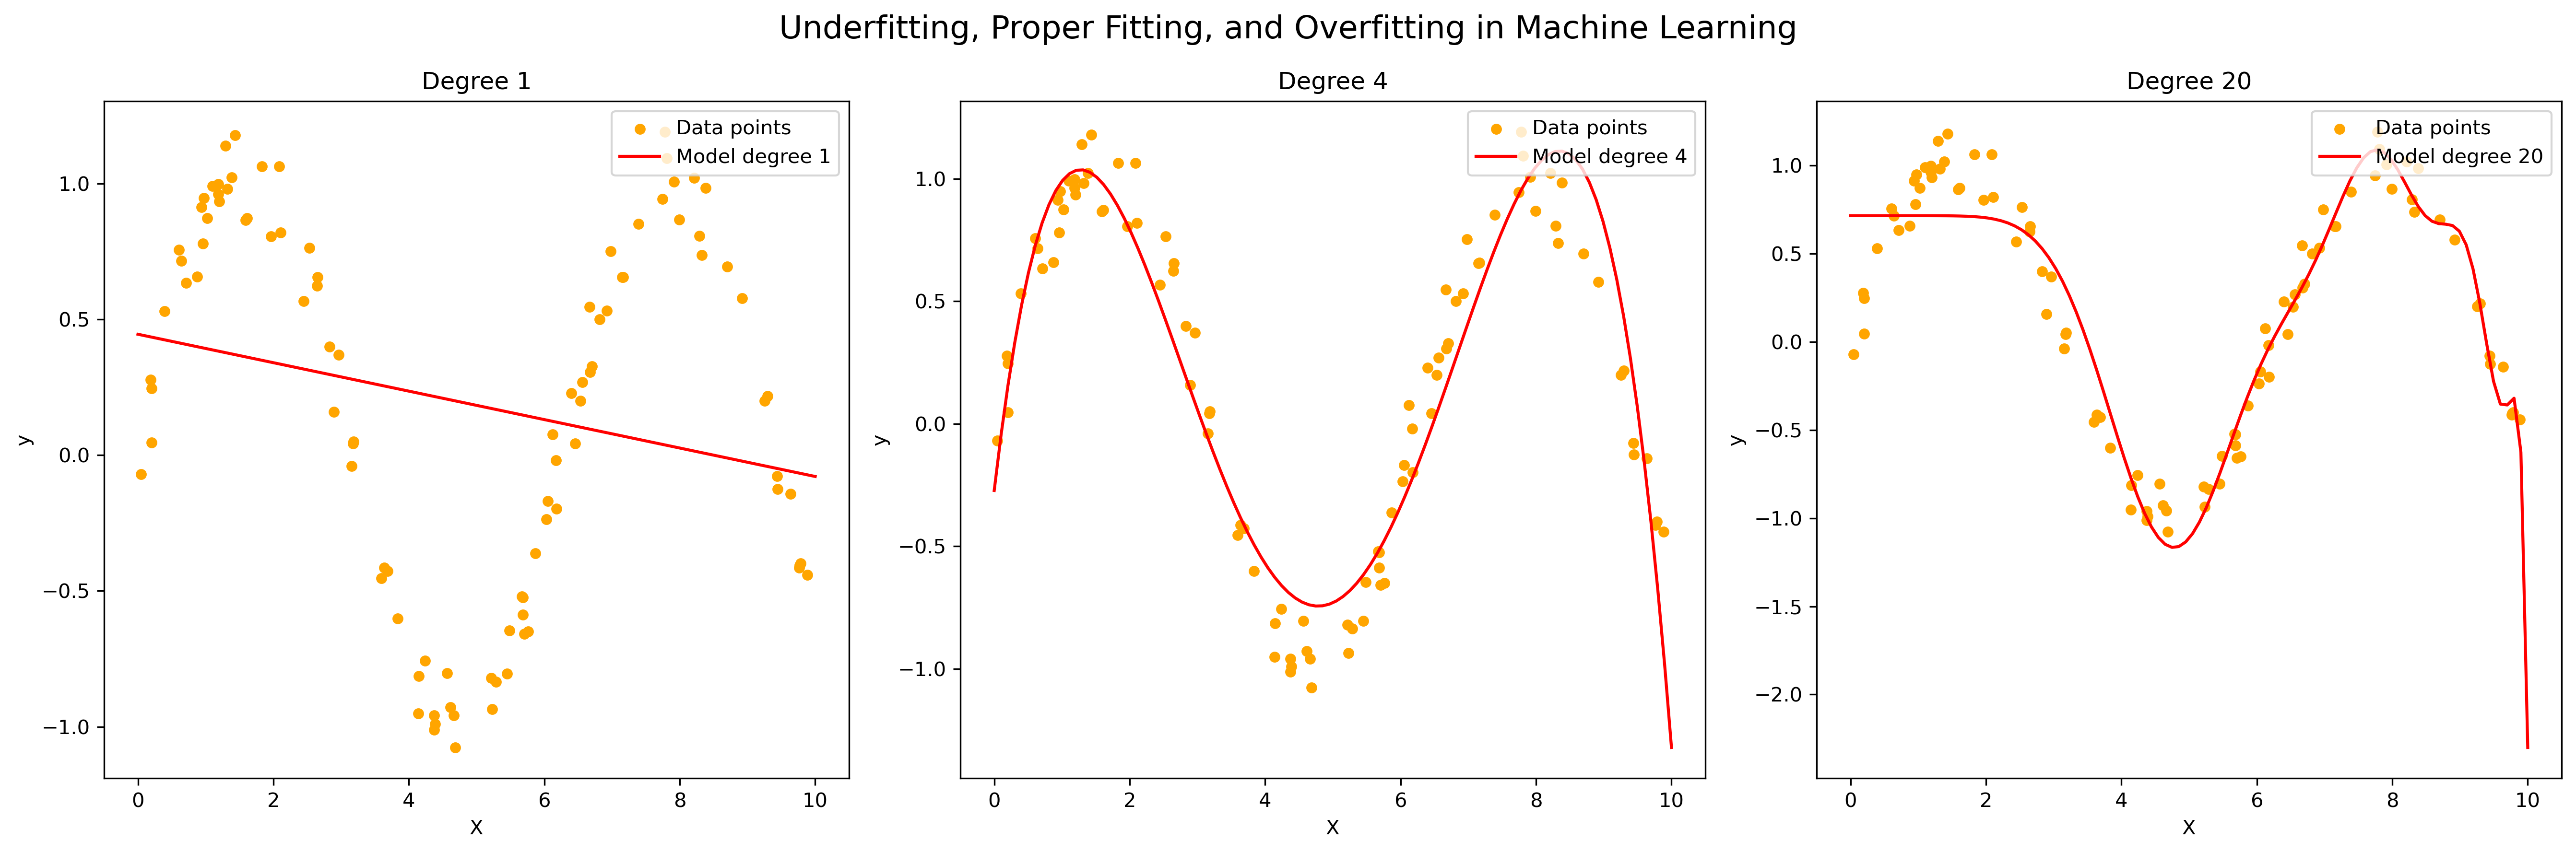

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 生成数据点
np.random.seed(0)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# 定义多项式的次数
degrees = [1, 4, 20]  # 一次多项式表示欠拟合，三次多项式表示拟合较好，二十次多项式表示过拟合

# 创建图形
plt.figure(figsize=(18, 6),dpi=300)

for i, degree in enumerate(degrees):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X, y, color='orange', s=20, label="Data points")
    
    # 创建多项式回归模型
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    
    # 生成测试数据并预测
    X_test = np.linspace(0, 10, 100).reshape(-1, 1)
    y_test = model.predict(X_test)
    
    # 绘制拟合曲线
    plt.plot(X_test, y_test, color='r', label=f"Model degree {degree}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Degree {degree}")
    plt.legend(loc='upper right')

# 设置总标题并调整布局
plt.suptitle("Underfitting, Proper Fitting, and Overfitting in Machine Learning", fontsize=16)
plt.tight_layout()
plt.show()

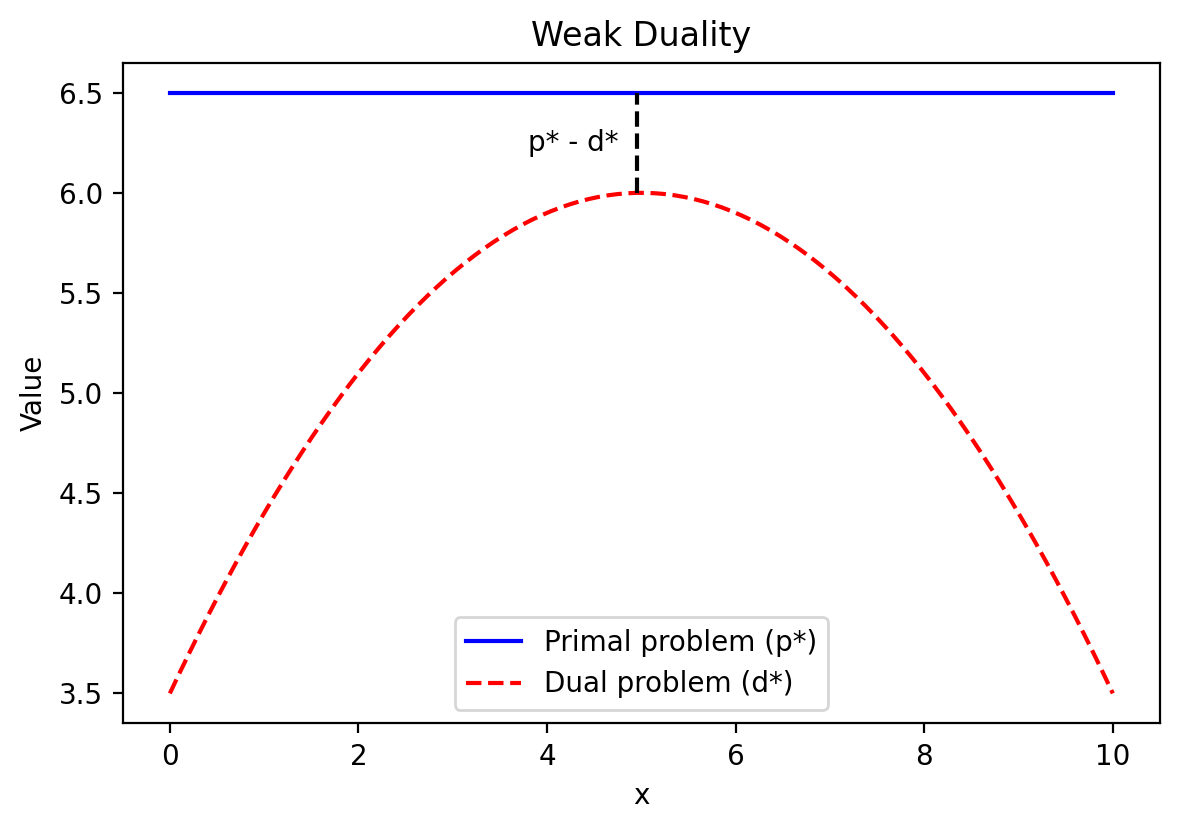

In [20]:
# Adding annotations and a dashed line to show the maximum value of d* to p* for Weak Duality
x = np.linspace(0, 10, 100)
p_star = 6.5 * np.ones_like(x)  # Constant function for p*
# Using the corrected concave function for weak duality
d_star_weak = 6 - 0.1 * (x - 5)**2

# Maximum value of d_star_weak
max_value_index = np.argmax(d_star_weak)
max_d_star_weak = d_star_weak[max_value_index]
x_max = x[max_value_index]

# Setting up the plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4.25),dpi=200)

# Weak Duality plot
ax.plot(x, p_star, 'b-', label='Primal problem (p*)')
ax.plot(x, d_star_weak, 'r--', label='Dual problem (d*)')
ax.fill_between(x, p_star, d_star_weak, where=(d_star_weak <= p_star), color='white', alpha=0.5)

# Adding dashed line and annotation
ax.plot([x_max, x_max], [max_d_star_weak, p_star[0]], 'k--')
ax.text(x_max, (max_d_star_weak + p_star[0]) / 2, f'p* - d*  ', 
        verticalalignment='center', horizontalalignment='right')

ax.set_title('Weak Duality')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


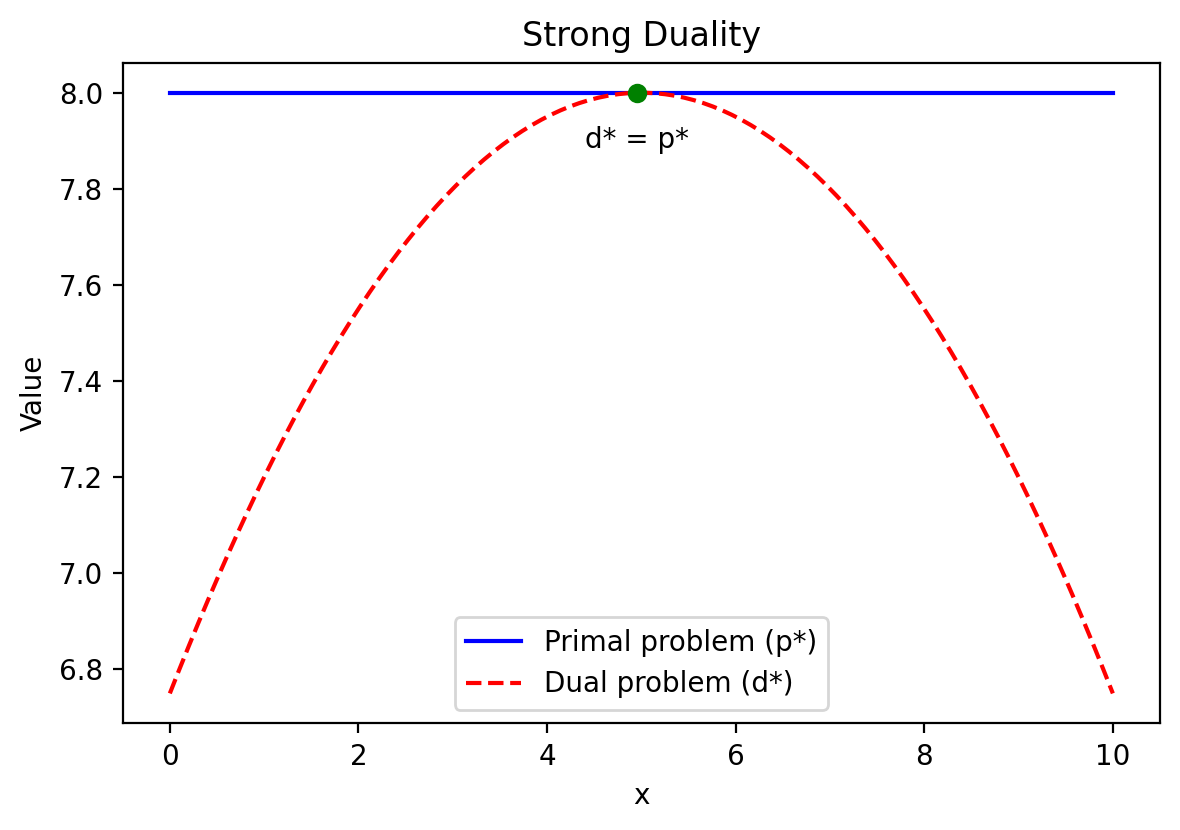

In [41]:
# Data for Strong Duality with quadratic concave function below p*
x = np.linspace(0, 10, 100)
p_star = 8 * np.ones_like(x)  # Constant function for p*
d_star_strong = 8 - 0.05 * (x - 5)**2  # Quadratic concave function for d* (Strong Duality)

# Maximum value of d_star_strong
max_value_index = np.argmax(d_star_strong)
max_d_star_strong = d_star_strong[max_value_index]
x_max = x[max_value_index]

# Setting up the plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4.25), dpi=200)

# Strong Duality plot
ax.plot(x, p_star, 'b-', label='Primal problem (p*)')
ax.plot(x, d_star_strong, 'r--', label='Dual problem (d*)')
ax.fill_between(x, p_star, d_star_strong, where=(d_star_strong <= p_star), color='white', alpha=0.5)

# Annotating the point where d* = p*
ax.scatter([x_max], [max_d_star_strong], color='green', zorder=5)
ax.annotate('d* = p*', (x_max, max_d_star_strong), textcoords="offset points", xytext=(0,-20), ha='center')

ax.set_title('Strong Duality')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()